**Voice Emotion Recognition**





In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import model_from_json
from matplotlib.pyplot import specgram
from matplotlib.axis import Axis
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from array import *
import re
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle
import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
dataset_path = '/content/drive/My Drive/My_AI/RawData'  # https://drive.google.com/drive/folders/19vC20XHt-_yhsobePchy7K3PcBHD1oCu?usp=sharing
model_path = '/content/drive/MyDrive/My_AI/NEW models/'      #'/content/drive/My Drive/My_AI/MY MODELS/'

model_name = 'EmotionRecognition_CNN_model_23_MALE_160values-Crema-D'
gender = 'male'  # female/male

# LABLES & FEATURES

In [ ]:
dataset_files_list = [] 
dataset_files_list = os.listdir(dataset_path)

print(len(dataset_files_list))

11475


In [ ]:
emo_labels_list=[] 
dataset = ''
count = 0
for item in dataset_files_list:
    file_label = item[6:-16]
    try:
      file_label = int(file_label)
      dataset = 'RAVDESS'
    except:
      if (item[:1] == 'Y') or (item[:1] == 'O'):
        file_label = re.split('_|\.', item)[2]
        dataset = 'TESS'
      else: 
        l = item.split('_')
        if len(l) == 4:
          dataset = 'CREMA-D'
        else:
          dataset = 'SAVEE'

    if dataset == 'RAVDESS':
      count+=1
      if int(item[18:-4])%2==0:  #female
          if file_label == 1:
            emo_labels_list.append('female_neutral')
          elif file_label == 2:
            emo_labels_list.append('female_calm')
          elif file_label == 3:
            emo_labels_list.append('female_joy')
          elif file_label == 4:
            emo_labels_list.append('female_sadness')
          elif file_label == 5:
            emo_labels_list.append('female_anger')
          elif file_label == 6:
            emo_labels_list.append('female_fear')
          elif file_label == 7:
            emo_labels_list.append('female_disgust')
          elif file_label == 8:
            emo_labels_list.append('female_surprise')
      else:
          if file_label== 1:
            emo_labels_list.append('male_neutral')
          elif file_label == 2:
            emo_labels_list.append('male_calm')
          elif file_label == 3:
            emo_labels_list.append('male_joy')
          elif file_label == 4:
            emo_labels_list.append('male_sadness')
          elif file_label == 5:
            emo_labels_list.append('male_anger')
          elif file_label == 6:
            emo_labels_list.append('male_fear')
          elif file_label == 7:
            emo_labels_list.append('male_disgust')
          elif file_label == 8:
            emo_labels_list.append('male_surprise')

    elif dataset == 'TESS':
      count+=1
      if file_label == 'neutral': emo_labels_list.append('female_neutral')
      elif file_label == 'angry': emo_labels_list.append('female_anger')
      elif file_label == 'disgust': emo_labels_list.append('female_disgust')
      elif file_label == 'ps': emo_labels_list.append('female_surprise')
      elif file_label == 'happy': emo_labels_list.append('female_joy')
      elif file_label == 'sad': emo_labels_list.append('female_sadness')
      elif file_label == 'fear': emo_labels_list.append('female_fear')

    elif dataset == 'CREMA-D':
      l = item.split('_')
      l_male = [1001,1005,1011,1014,1015,1016,1017,1019,1022,1023,1026,1027,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1044,1045,1048,1050,1051,1057,1059,1062,1064,1065,1066,1067,1068,1069,1070,1071,1077,1080,1081,1083,1087,1088,1090]
      if int(l[0]) in l_male: 
        count+=1
        file_label = l[2]
        if file_label == 'NEU': emo_labels_list.append('male_neutral')
        elif file_label == 'ANG': emo_labels_list.append('male_anger')
        elif file_label == 'DIS': emo_labels_list.append('male_disgust')
        elif file_label == 'HAP': emo_labels_list.append('male_joy')
        elif file_label == 'SAD': emo_labels_list.append('male_sadness')
        elif file_label == 'FEA': emo_labels_list.append('male_fear')
      else:
        count+=1
        file_label = l[2]
        if file_label == 'NEU': emo_labels_list.append('female_neutral')
        elif file_label == 'ANG': emo_labels_list.append('female_anger')
        elif file_label == 'DIS': emo_labels_list.append('female_disgust')
        elif file_label == 'HAP': emo_labels_list.append('female_joy')
        elif file_label == 'SAD': emo_labels_list.append('female_sadness')
        elif file_label == 'FEA': emo_labels_list.append('female_fear')
      
    elif dataset == 'SAVEE':
      count+=1
      if item[:1]=='a':
        emo_labels_list.append('male_anger')
      elif item[:1]=='f':
        emo_labels_list.append('male_fear')
      elif item[:1]=='h':
        emo_labels_list.append('male_joy')
      elif item[:1]=='n':
        emo_labels_list.append('male_neutral')
      elif item[:2]=='sa':
        emo_labels_list.append('male_sadness')
      elif item[:2]=='su':
        emo_labels_list.append('male_surprise')
      elif item[:1]=='d':
        emo_labels_list.append('male_disgust')

print(count)

11475


In [ ]:
labels = pd.DataFrame(emo_labels_list)
labels   

,0
0,female_fear
1,female_fear
2,female_sadness
3,female_joy
4,female_disgust
...,...
11470,female_joy
11471,female_sadness
11472,female_anger
11473,female_joy


Getting the features of audio files using librosa

In [13]:
def transform_feature(arr, num=20):   # to 20 values per feature
  l = len(arr)
  r = l%num
  if r==0:
    arr = np.mean(np.reshape(arr, (num,-1)), axis=1)
  elif r%2==0:
    arr = arr[int(r/2):-int(r/2)]
    arr = np.mean(np.reshape(arr, (num,-1)), axis=1)
  else:
    arr = arr[int(r/2+1):(len(arr)-int(r/2))]
    arr = np.mean(np.reshape(arr, (num,-1)), axis=1)
  return arr

def extract_feature(current_file, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    rolloff = kwargs.get("rolloff")
    centroids = kwargs.get("centroids")
    rms = kwargs.get("rms")

    X, sample_rate = librosa.core.load(current_file)

    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc= 20 ), axis=0)
        mfccs = transform_feature(mfccs) # (n=20,t) -> 20 values (avg)
        result = np.hstack((result, mfccs))  
    if rms:    
        rms = np.mean(librosa.feature.rms(X),axis=0)
        rms = transform_feature(rms)      # (1,t) - > 20 values (avg)
        result = np.hstack((result, rms))        
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate, n_fft = 2048), axis=0) # (128,t) 
        mel = transform_feature(mel)  # t -> 20 values (avg)
        result = np.hstack((result, mel)) 
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate), axis=0) # (6,t) -> 6 values   
        tonnetz = transform_feature(tonnetz)  
        result = np.hstack((result, tonnetz))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, n_chroma = 10, sr=sample_rate, n_fft = 2048), axis=0)  # (n=14,t) -> 14 values   
        chroma = transform_feature(chroma)     
        result = np.hstack((result, chroma))              
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate), axis=0) # (7,t) -> 7 values
        contrast = transform_feature(contrast)
        result = np.hstack((result, contrast)) 
    if rolloff:    
        rolloff = np.mean(librosa.feature.spectral_rolloff(X + 0.01, sr=sample_rate,n_fft=2048), axis=0)
        rolloff = transform_feature(rolloff)    # (1,t) - > 20 values (avg)
        result = np.hstack((result, rolloff)) 
    if centroids:    
        centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate, n_fft=2048), axis=0)
        centroids = transform_feature(centroids)  # (1,t) - > 20 values (avg)
        result = np.hstack((result, centroids)) 
    
    return result

f = os.fspath(dataset_path + '/1078_MTI_ANG_XX.wav')
a = extract_feature(f, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True, rolloff=True, centroids=True, rms=True)
print(a, a.shape)

feature_num_values = a.shape[0]  # number of values per file

[-1.40765276e+01 -1.17176304e+01 -1.11633663e+01 -1.10790663e+01
 -1.07774687e+01 -1.05370426e+01 -1.03541460e+01 -9.13975620e+00
 -9.50955486e+00 -1.00974951e+01 -1.07620468e+01 -1.02513018e+01
 -1.00416851e+01 -9.85334873e+00 -1.10257387e+01 -1.21459579e+01
 -1.22862349e+01 -1.17299776e+01 -1.31954193e+01 -1.30548735e+01
  5.34453709e-03  4.69109006e-02  4.77194898e-02  2.04378311e-02
  2.07569897e-02  6.38693422e-02  1.15599774e-01  1.28232926e-01
  1.19728044e-01  4.23759073e-02  6.89805821e-02  3.91004011e-02
  2.99107432e-02  2.31280867e-02  1.03316210e-01  1.08218350e-01
  4.17245924e-02  9.10387840e-03  5.57138817e-03  4.28530062e-03
  4.66448301e-03  5.39627373e-01  5.17243147e-01  9.77239087e-02
  9.27279145e-02  1.06992722e+00  3.25262403e+00  3.27466846e+00
  4.60871553e+00  4.21025276e-01  1.31157303e+00  2.56834269e-01
  2.00264901e-01  1.06908917e-01  3.04708433e+00  2.77486229e+00
  4.00192797e-01  1.83953121e-02  6.66718464e-03  4.41992190e-03
 -3.15699636e-02 -9.85686

EXTRACT FEATURES FROM THE FILES IN THE DATASETS

In [ ]:
data_frame_features = pd.DataFrame(columns=['all_features'])

for index,y in enumerate(dataset_files_list):
      all_features_ndarray = extract_feature(dataset_path + '/'+ y, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True, rolloff=True, centroids=True, rms=True)
      data_frame_features.loc[index] = [all_features_ndarray]
      if index%1000==0: print(index)

print(pd.DataFrame(data_frame_features['all_features']).shape)
        

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
(11475, 1)


In [ ]:
data_frame_features = pd.DataFrame(data_frame_features['all_features'].values.tolist())
data_frame_labels = pd.concat([data_frame_features,labels], axis=1)
data_frame_labels = data_frame_labels.rename(index=str, columns={"0": "label"})
data_frame_labels  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,0
0,-14.001645,-16.420015,-15.282066,-13.852800,-14.474461,-13.692190,-13.760521,-12.912683,-12.232044,-12.420877,-12.735839,-13.635492,-12.609794,-13.390270,-12.628803,-14.625647,-15.455193,-15.036901,-15.336130,-15.129274,0.003508,0.002787,0.003816,0.008613,0.009645,0.004321,0.008104,0.011055,0.019364,0.021430,0.011229,0.016909,0.010804,0.006458,0.011555,0.006776,0.003568,0.004122,0.004004,0.004328,...,815.570068,2209.844971,1512.707520,764.428711,4002.484131,2767.016602,3337.646484,2077.954102,2298.669434,4155.908203,2783.166504,2287.902832,3423.779297,3203.063965,1555.773926,2952.740479,503.338623,670.220947,522.180176,1032.345116,1195.405109,1476.024277,1078.928237,824.045725,2134.877378,1471.372649,1789.701935,1222.777688,1110.573251,2448.615430,1484.458798,1473.162969,1785.623497,1538.424988,1091.299937,1647.493716,895.013885,994.046995,929.995644,female_fear
1,-14.181437,-14.227972,-14.346809,-14.574840,-14.405001,-15.773590,-14.563650,-14.663010,-13.942383,-14.310740,-15.048991,-14.606794,-14.499234,-14.688379,-13.961319,-13.985487,-13.954630,-15.052523,-16.127869,-15.184558,0.003582,0.004050,0.004071,0.003953,0.004540,0.003696,0.006541,0.009024,0.008582,0.009070,0.004858,0.005241,0.003474,0.003553,0.003964,0.003890,0.003796,0.003410,0.003343,0.003554,...,1136.953125,775.195312,1838.935547,1546.083984,2771.323242,5398.374023,1795.869141,1841.088867,1263.999023,2846.689453,1231.699219,1395.351562,2702.416992,1658.056641,652.456055,557.709961,615.849609,717.055664,630.922852,1221.445334,1111.220252,1083.145653,1299.753324,1159.692894,1657.622931,2962.384442,1123.241505,1202.036819,950.778731,1522.824232,1067.465846,1228.571965,1591.153537,1248.999490,952.040204,936.140824,1032.538438,1041.850080,997.811080,female_fear
2,-14.926227,-15.975286,-15.106883,-13.394897,-12.636229,-13.131749,-13.309232,-13.464731,-13.851240,-13.966360,-14.537578,-14.399023,-14.051931,-15.938583,-15.582222,-15.628225,-15.233683,-15.904941,-15.204542,-14.231422,0.003845,0.004033,0.004090,0.004962,0.008077,0.012526,0.010097,0.009148,0.005922,0.005718,0.005750,0.004704,0.004056,0.003521,0.003322,0.003505,0.003907,0.003366,0.004005,0.003783,...,1229.545898,1154.179688,2680.883789,4515.512695,1987.514648,2336.352539,1201.552734,1795.869141,1927.221680,1289.838867,753.662109,2413.872070,880.708008,652.456055,650.302734,574.936523,643.842773,594.316406,590.009766,986.144146,1146.128432,1151.274382,1511.866426,2542.038648,1118.107979,1229.576730,911.820695,1218.564140,1295.741170,1147.903585,945.857250,1519.606579,1056.073480,1002.625022,1051.185887,958.704861,1033.020291,991.865262,961.776121,female_sadness
3,-14.245683,-15.056963,-13.887414,-13.796400,-15.968222,-15.037264,-13.578198,-10.451653,-13.085897,-12.607808,-12.468238,-10.372175,-11.565897,-13.287900,-9.977800,-11.278666,-12.580770,-10.971338,-12.995969,-14.323526,0.003988,0.003343,0.004291,0.004415,0.003212,0.003534,0.008161,0.023285,0.020864,0.013244,0.017452,0.032231,0.024983,0.021386,0.053847,0.037631,0.017839,0.034428,0.012368,0.004383,...,632.537842,506.030273,562.554932,611.004639,707.904053,1574.615479,2688.958740,1725.347900,3143.847656,2457.476807,3052.331543,2705.108643,3894.818115,3092.706299,2435.943604,2804.699707,2514.001465,1402.349854,866.711426,929.284030,1076.450162,910.988309,957.066662,1080.025229,1024.919729,1121.246048,1447.041889,1058.958698,1594.978454,1399.607580,1789.382389,1471.698775,2015.987402,1863.053283,1613.772651,1583.607751,1525.432898,981.473503,1070.904955,female_joy
4,-13.967707,-14.718823,-14.744510,-14.815735,-15.238696,-10.948950,-10.676140,-11.005181,-9.562460,-9.358127,-9.968491,-12.814047,-10.069592,-10.496824,-13.605512,-13.205243,-14.385982,-14.260553,-15.275540,-13.586431,0.0042

# SAVE DATASET FEATURES AND LABELS 

In [ ]:
with open((model_path + "dataset_RAVDESS_TESS_SAVEE_CREMA-D" + '_dataFrame.pkl'), 'wb') as f:
  pickle.dump(data_frame_labels, f)

# LOAD DATASET FEATURES AND LABELS 

In [ ]:
with open((model_path + "dataset_RAVDESS_TESS_SAVEE_CREMA-D" + '_dataFrame.pkl'), 'rb') as f:
  data_frame_labels = pickle.load(f)

data_frame_labels

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,0
0,-14.001645,-16.420015,-15.282066,-13.852800,-14.474461,-13.692190,-13.760521,-12.912683,-12.232044,-12.420877,-12.735839,-13.635492,-12.609794,-13.390270,-12.628803,-14.625647,-15.455193,-15.036901,-15.336130,-15.129274,0.003508,0.002787,0.003816,0.008613,0.009645,0.004321,0.008104,0.011055,0.019364,0.021430,0.011229,0.016909,0.010804,0.006458,0.011555,0.006776,0.003568,0.004122,0.004004,0.004328,...,815.570068,2209.844971,1512.707520,764.428711,4002.484131,2767.016602,3337.646484,2077.954102,2298.669434,4155.908203,2783.166504,2287.902832,3423.779297,3203.063965,1555.773926,2952.740479,503.338623,670.220947,522.180176,1032.345116,1195.405109,1476.024277,1078.928237,824.045725,2134.877378,1471.372649,1789.701935,1222.777688,1110.573251,2448.615430,1484.458798,1473.162969,1785.623497,1538.424988,1091.299937,1647.493716,895.013885,994.046995,929.995644,female_fear
1,-14.181437,-14.227972,-14.346809,-14.574840,-14.405001,-15.773590,-14.563650,-14.663010,-13.942383,-14.310740,-15.048991,-14.606794,-14.499234,-14.688379,-13.961319,-13.985487,-13.954630,-15.052523,-16.127869,-15.184558,0.003582,0.004050,0.004071,0.003953,0.004540,0.003696,0.006541,0.009024,0.008582,0.009070,0.004858,0.005241,0.003474,0.003553,0.003964,0.003890,0.003796,0.003410,0.003343,0.003554,...,1136.953125,775.195312,1838.935547,1546.083984,2771.323242,5398.374023,1795.869141,1841.088867,1263.999023,2846.689453,1231.699219,1395.351562,2702.416992,1658.056641,652.456055,557.709961,615.849609,717.055664,630.922852,1221.445334,1111.220252,1083.145653,1299.753324,1159.692894,1657.622931,2962.384442,1123.241505,1202.036819,950.778731,1522.824232,1067.465846,1228.571965,1591.153537,1248.999490,952.040204,936.140824,1032.538438,1041.850080,997.811080,female_fear
2,-14.926227,-15.975286,-15.106883,-13.394897,-12.636229,-13.131749,-13.309232,-13.464731,-13.851240,-13.966360,-14.537578,-14.399023,-14.051931,-15.938583,-15.582222,-15.628225,-15.233683,-15.904941,-15.204542,-14.231422,0.003845,0.004033,0.004090,0.004962,0.008077,0.012526,0.010097,0.009148,0.005922,0.005718,0.005750,0.004704,0.004056,0.003521,0.003322,0.003505,0.003907,0.003366,0.004005,0.003783,...,1229.545898,1154.179688,2680.883789,4515.512695,1987.514648,2336.352539,1201.552734,1795.869141,1927.221680,1289.838867,753.662109,2413.872070,880.708008,652.456055,650.302734,574.936523,643.842773,594.316406,590.009766,986.144146,1146.128432,1151.274382,1511.866426,2542.038648,1118.107979,1229.576730,911.820695,1218.564140,1295.741170,1147.903585,945.857250,1519.606579,1056.073480,1002.625022,1051.185887,958.704861,1033.020291,991.865262,961.776121,female_sadness
3,-14.245683,-15.056963,-13.887414,-13.796400,-15.968222,-15.037264,-13.578198,-10.451653,-13.085897,-12.607808,-12.468238,-10.372175,-11.565897,-13.287900,-9.977800,-11.278666,-12.580770,-10.971338,-12.995969,-14.323526,0.003988,0.003343,0.004291,0.004415,0.003212,0.003534,0.008161,0.023285,0.020864,0.013244,0.017452,0.032231,0.024983,0.021386,0.053847,0.037631,0.017839,0.034428,0.012368,0.004383,...,632.537842,506.030273,562.554932,611.004639,707.904053,1574.615479,2688.958740,1725.347900,3143.847656,2457.476807,3052.331543,2705.108643,3894.818115,3092.706299,2435.943604,2804.699707,2514.001465,1402.349854,866.711426,929.284030,1076.450162,910.988309,957.066662,1080.025229,1024.919729,1121.246048,1447.041889,1058.958698,1594.978454,1399.607580,1789.382389,1471.698775,2015.987402,1863.053283,1613.772651,1583.607751,1525.432898,981.473503,1070.904955,female_joy
4,-13.967707,-14.718823,-14.744510,-14.815735,-15.238696,-10.948950,-10.676140,-11.005181,-9.562460,-9.358127,-9.968491,-12.814047,-10.069592,-10.496824,-13.605512,-13.205243,-14.385982,-14.260553,-15.275540,-13.586431,0.0042

In [ ]:
labels_array = data_frame_labels.iloc[:,(data_frame_labels.shape[1]-1):].to_numpy()
features_array = data_frame_labels.iloc[:,:(data_frame_labels.shape[1]-1)].to_numpy()
print(labels_array)
print(features_array)
print(labels_array.shape)
print(features_array.shape)

[['female_fear']
 ['female_fear']
 ['female_sadness']
 ...
 ['female_anger']
 ['female_joy']
 ['female_anger']]
[[ -14.00164509  -16.42001534  -15.28206635 ...  895.01388538
   994.04699455  929.99564361]
 [ -14.18143749  -14.22797203  -14.34680939 ... 1032.53843832
  1041.85008016  997.81107966]
 [ -14.92622662  -15.97528648  -15.10688305 ... 1033.02029109
   991.86526159  961.77612106]
 ...
 [ -29.99061584  -29.83097076  -28.57129669 ... 2778.01905641
  3689.97075201 2234.37245116]
 [ -32.0018425   -31.29645157  -32.54829025 ... 2511.52587746
  2790.35257666 2945.9173554 ]
 [ -28.9853611   -28.36181068  -27.84866333 ... 2015.97158624
  2072.86320597 2739.19807068]]
(11475, 1)
(11475, 160)


# **PREPROCESSING - SCALING**




In [ ]:
scaler = MinMaxScaler()
features_array_scaled = scaler.fit_transform(features_array)

pickle.dump(scaler, open(model_path + model_name + '_SCALER.sav', 'wb'))

features_array_scaled

array([[0.81322564, 0.77028701, 0.75554995, ..., 0.10814453, 0.11836561,
        0.10764039],
       [0.80979077, 0.81234341, 0.77266532, ..., 0.12476163, 0.12405774,
        0.11548955],
       [0.79556184, 0.77881955, 0.75875583, ..., 0.12481985, 0.11810583,
        0.11131876],
       ...,
       [0.50776197, 0.5129853 , 0.51235464, ..., 0.33566806, 0.43938129,
        0.25861275],
       [0.46933819, 0.48486868, 0.43957494, ..., 0.30346769, 0.33225974,
        0.34096902],
       [0.526967  , 0.54117251, 0.52557896, ..., 0.24358986, 0.24682508,
        0.31704273]])

In [ ]:
scaler = pickle.load(open(model_path + model_name + '_SCALER.sav', 'rb'))
features_array_scaled = scaler.transform(features_array)
features_array_scaled

array([[0.81322564, 0.77028701, 0.75554995, ..., 0.10814453, 0.11836561,
        0.10764039],
       [0.80979077, 0.81234341, 0.77266532, ..., 0.12476163, 0.12405774,
        0.11548955],
       [0.79556184, 0.77881955, 0.75875583, ..., 0.12481985, 0.11810583,
        0.11131876],
       ...,
       [0.50776197, 0.5129853 , 0.51235464, ..., 0.33566806, 0.43938129,
        0.25861275],
       [0.46933819, 0.48486868, 0.43957494, ..., 0.30346769, 0.33225974,
        0.34096902],
       [0.526967  , 0.54117251, 0.52557896, ..., 0.24358986, 0.24682508,
        0.31704273]])

# **SAVE SCALED ARRAY AND LABELS**






In [ ]:
with open((model_path + model_name + '_SCALED_featuresArray.pkl'), 'wb') as f:
  pickle.dump(features_array_scaled, f)

with open((model_path + model_name + '_labelsArray.pkl'), 'wb') as f:
  pickle.dump(labels_array, f)

# LOAD LABELS AND SCALED FEATURES

In [3]:
with open((model_path + model_name + '_SCALED_featuresArray.pkl'), 'rb') as f:
  features_array_scaled = pickle.load(f)

with open((model_path + model_name + '_labelsArray.pkl'), 'rb') as f:
  labels_array = pickle.load(f)

In [5]:
def takeMaleData(labels_array, features_array_scaled):
  labels_filtered_array = []
  features_filtered_array =  []

  for index, i in enumerate(labels_array):
    if 'female' not in i[0]:  
      labels_filtered_array.append(labels_array[index])
      features_filtered_array.append(features_array_scaled[index])
  return np.array(labels_filtered_array), np.array(features_filtered_array)

def takeFemaleData(labels_array, features_array_scaled):
  labels_filtered_array = []
  features_filtered_array =  []

  for index, i in enumerate(labels_array):
    if 'female' in i[0]:  
      labels_filtered_array.append(labels_array[index])
      features_filtered_array.append(features_array_scaled[index])
  return np.array(labels_filtered_array), np.array(features_filtered_array)

if gender.lower() == 'female':
  labels_filtered_array, features_filtered_array = takeFemaleData(labels_array, features_array_scaled)  
elif gender.lower() == 'male':
  labels_filtered_array, features_filtered_array = takeMaleData(labels_array, features_array_scaled) 
  
print(labels_filtered_array)
print(labels_filtered_array.shape)

[['male_sadness']
 ['male_anger']
 ['male_neutral']
 ...
 ['male_disgust']
 ['male_surprise']
 ['male_anger']]
(4788, 1)


SAVE LABEL ENCODER CLASSES

In [6]:
lb = LabelEncoder()
lb.fit(labels_filtered_array)
print(lb.classes_)
with open((model_path + gender + '_classes_emotions.pkl'), 'wb') as f:
  pickle.dump(lb.classes_, f)  

['male_anger' 'male_calm' 'male_disgust' 'male_fear' 'male_joy'
 'male_neutral' 'male_sadness' 'male_surprise']


LOAD LABEL ENCODER CLASSES

In [7]:
lb = LabelEncoder()
with open((model_path + gender + '_classes_emotions.pkl'), 'rb') as f:
  lb.classes_ = pickle.load(f)
print(lb.classes_)

['male_anger' 'male_calm' 'male_disgust' 'male_fear' 'male_joy'
 'male_neutral' 'male_sadness' 'male_surprise']


SHUFFLE FILES AND LABELS 

In [8]:
features_filt_shuff_array, labels_filt_shuff_array = shuffle(features_filtered_array, labels_filtered_array)

print(features_filt_shuff_array)
print()
print(labels_filt_shuff_array)

[[0.8496605  0.88231247 0.82574062 ... 0.51854009 0.36853157 0.14748568]
 [0.85244795 0.85862409 0.8073689  ... 0.13935522 0.14748022 0.1293354 ]
 [0.84042379 0.83880458 0.79063254 ... 0.14700271 0.1366996  0.1341366 ]
 ...
 [0.4796557  0.48167536 0.46484984 ... 0.32334383 0.37326445 0.39872983]
 [0.8800522  0.87020673 0.80572485 ... 0.13667362 0.12605799 0.13208617]
 [0.84247659 0.84091514 0.79941255 ... 0.14106122 0.13940194 0.1438765 ]]

[['male_anger']
 ['male_anger']
 ['male_sadness']
 ...
 ['male_fear']
 ['male_joy']
 ['male_joy']]



# Dividing the data into test and train

In [9]:
train_samples_num = round(len(labels_filtered_array)*0.8)

X_train = np.array(features_filt_shuff_array[:train_samples_num]) #train_features_array
y_train = np.array(labels_filt_shuff_array[:train_samples_num]) #train_label_array
X_test = np.array(features_filt_shuff_array[train_samples_num:]) #test_features_array
y_test = np.array(labels_filt_shuff_array[train_samples_num:]) #test_label_array

TRANSFORM LABELS

In [10]:
y_train = np_utils.to_categorical(lb.transform(y_train))
y_test = np_utils.to_categorical(lb.transform(y_test))

Changing dimension for CNN model

In [11]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
print(x_testcnn)

[[[0.76222485]
  [0.79355844]
  [0.76025631]
  ...
  [0.11660527]
  [0.12739804]
  [0.10728742]]

 [[0.80531394]
  [0.85130412]
  [0.81225461]
  ...
  [0.1286644 ]
  [0.11522615]
  [0.12493214]]

 [[0.76707305]
  [0.76456334]
  [0.71061756]
  ...
  [0.13320053]
  [0.13379134]
  [0.12396517]]

 ...

 [[0.4796557 ]
  [0.48167536]
  [0.46484984]
  ...
  [0.32334383]
  [0.37326445]
  [0.39872983]]

 [[0.8800522 ]
  [0.87020673]
  [0.80572485]
  ...
  [0.13667362]
  [0.12605799]
  [0.13208617]]

 [[0.84247659]
  [0.84091514]
  [0.79941255]
  ...
  [0.14106122]
  [0.13940194]
  [0.1438765 ]]]


# **MODEL**

In [14]:
model = Sequential() 

model.add(Conv1D(feature_num_values, kernel_size=5,padding='same', activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), input_shape=(feature_num_values,1)))

model.add(Conv1D(128, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Conv1D(128, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Dense(units=64, activation='tanh',input_dim=2,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Flatten())

model.add(Dense(units=32, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(8))
model.add(Activation('softmax')) 

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 160, 160)          960       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 160, 128)          102528    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 160, 128)          82048     
_________________________________________________________________
dropout (Dropout)            (None, 160, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 160, 64)           41024     
_________________________________________________________________
dense (Dense)                (None, 160, 64)           4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 160, 64)          

In [16]:
model.compile(loss= 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [17]:
cnnhistory = model.fit(x_traincnn, y_train, batch_size = 32, epochs = 100, validation_data = (x_testcnn, y_test))

Epoch 1/100
120/120 [==============================] - 30s 236ms/step - loss: 2.1056 - accuracy: 0.1935 - val_loss: 1.9506 - val_accuracy: 0.3152
Epoch 2/100
120/120 [==============================] - 28s 232ms/step - loss: 1.9024 - accuracy: 0.2961 - val_loss: 1.8494 - val_accuracy: 0.3215
Epoch 3/100
120/120 [==============================] - 28s 233ms/step - loss: 1.8412 - accuracy: 0.3289 - val_loss: 1.7775 - val_accuracy: 0.3852
Epoch 4/100
120/120 [==============================] - 28s 233ms/step - loss: 1.7821 - accuracy: 0.3668 - val_loss: 1.7223 - val_accuracy: 0.4040
Epoch 5/100
120/120 [==============================] - 28s 232ms/step - loss: 1.7287 - accuracy: 0.3913 - val_loss: 1.7124 - val_accuracy: 0.4029
Epoch 6/100
120/120 [==============================] - 28s 232ms/step - loss: 1.7252 - accuracy: 0.3803 - val_loss: 1.6909 - val_accuracy: 0.4102
Epoch 7/100
120/120 [==============================] - 28s 232ms/step - loss: 1.7142 - accuracy: 0.4084 - val_loss: 1.7008 -

# **PLOTTING**

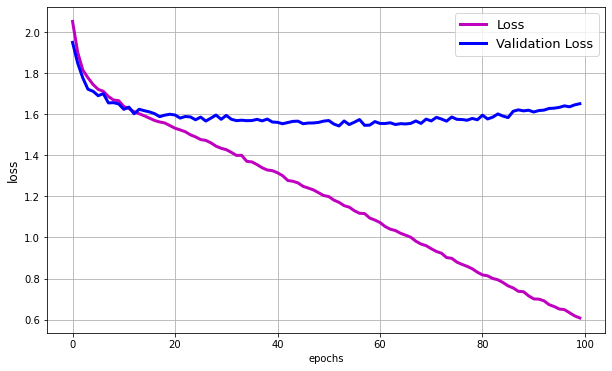

In [18]:
plt.figure(figsize=(10,6))
plt.plot(cnnhistory.history['loss'], 'm', linewidth=3)
plt.plot(cnnhistory.history['val_loss'], 'b', linewidth=3)
plt.legend(['Loss', 'Validation Loss'], fontsize=13)
plt.xlabel('epochs')
plt.ylabel('loss', fontsize=12)
plt.grid(True)
plt.show()

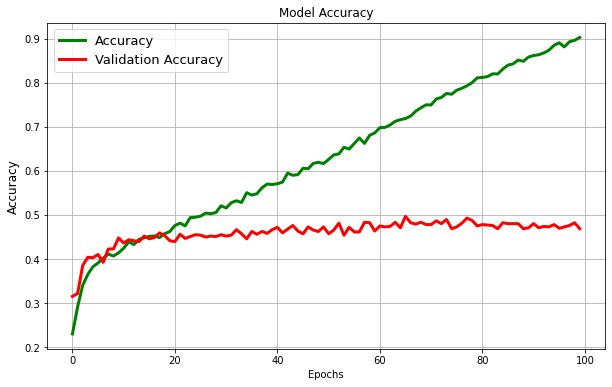

In [19]:
plt.figure(figsize=(10,6), frameon=True)
plt.plot(cnnhistory.history['accuracy'], 'g', linewidth=3)
plt.plot(cnnhistory.history['val_accuracy'], 'r', linewidth=3)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy', fontsize=12)
plt.legend(['Accuracy', 'Validation Accuracy'], loc = 'upper left', fontsize=13)
plt.grid(True)
plt.show()

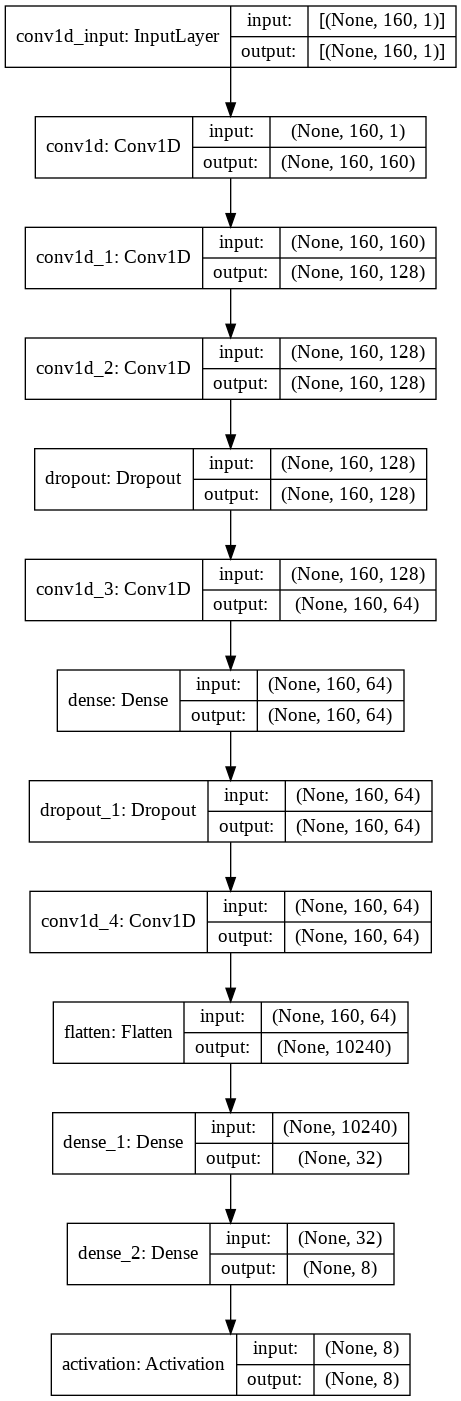

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="img_model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

dot_img_file = (model_path + 'img_cnn_model_' + model_name + '.png')
tf.keras.utils.plot_model(model, to_file = dot_img_file, show_shapes=True)


# **SAVING THE MODEL**

In [20]:
model.save(os.path.join(model_path, (model_name + '_MODEL.h5')))
print('Saved trained model at %s ' % model_path)

model_json = model.to_json()
with open((model_path + model_name + '_MODEL.json'), "w") as json_file:
    json_file.write(model_json)

Saved trained model at /content/drive/MyDrive/My_AI/NEW models/ 


# **LOADING THE MODEL**

In [21]:
json_file = open(model_path + model_name + '_MODEL.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(model_path + model_name + '_MODEL.h5')
print("Loaded model from disk")

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 46.87%


# **Predicting emotions on the test data**


In [22]:
lb = LabelEncoder()
with open((model_path + gender + '_classes_emotions.pkl'), 'rb') as f:
  lb.classes_ = pickle.load(f)
print(lb.classes_)

predicted = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)
predicted = predicted.argmax(axis=1)
predicted = predicted.astype(int).flatten()

predictions = (lb.inverse_transform((predicted)))
predictions_df = pd.DataFrame({'predictedvalues': predictions})

actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()

actual_labels = (lb.inverse_transform((actual)))

actual_labels = pd.DataFrame({'actualvalues': actual_labels})
actual_pred_df = actual_labels.join(predictions_df)

actual_pred_df[40:50]

['male_anger' 'male_calm' 'male_disgust' 'male_fear' 'male_joy'
 'male_neutral' 'male_sadness' 'male_surprise']
30/30 [==============================] - 2s 58ms/step


,actualvalues,predictedvalues
40,male_neutral,male_sadness
41,male_anger,male_anger
42,male_surprise,male_anger
43,male_joy,male_disgust
44,male_sadness,male_disgust
45,male_surprise,male_surprise
46,male_anger,male_anger
47,male_sadness,male_sadness
48,male_fear,male_fear
49,male_sadness,male_disgust


In [23]:
actual_pred_df.groupby('actualvalues').count()

,predictedvalues
actualvalues,
male_anger,167
male_calm,14
male_disgust,148
male_fear,149
male_joy,144
male_neutral,151
male_sadness,150
male_surprise,35


In [24]:
actual_pred_df.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
male_anger,179
male_calm,15
male_disgust,152
male_fear,105
male_joy,159
male_neutral,153
male_sadness,167
male_surprise,28


In [25]:
actual_pred_df.to_csv(model_path + model_name + '_PREDICTIONS' + '.csv', index=False)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

classes = actual_pred_df.actualvalues.unique()
classes.sort()    
print(classification_report(actual_pred_df.actualvalues, actual_pred_df.predictedvalues, target_names=classes))


               precision    recall  f1-score   support

   male_anger       0.64      0.68      0.66       167
    male_calm       0.60      0.64      0.62        14
 male_disgust       0.36      0.36      0.36       148
    male_fear       0.42      0.30      0.35       149
     male_joy       0.36      0.40      0.38       144
 male_neutral       0.52      0.53      0.53       151
 male_sadness       0.44      0.49      0.46       150
male_surprise       0.61      0.49      0.54        35

     accuracy                           0.47       958
    macro avg       0.49      0.49      0.49       958
 weighted avg       0.47      0.47      0.47       958



0.46868475991649267


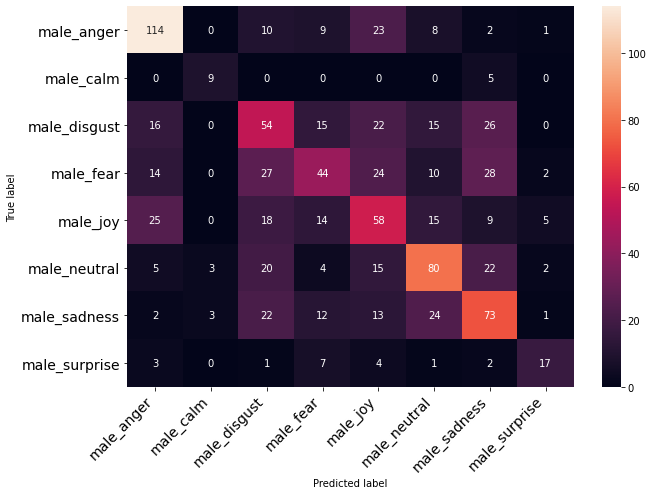

In [27]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def gender(row):
    if row == 'male_disgust' or 'male_fear' or 'male_joy' or 'male_sadness' or 'male_surprise' or 'male_neutral' or 'male_anger' or 'male_calm':
        return 'male'

actual_pred_df = pd.read_csv(model_path + model_name + '_PREDICTIONS' + '.csv')
classes = actual_pred_df.actualvalues.unique()
classes.sort()    

c = confusion_matrix(actual_pred_df.actualvalues, actual_pred_df.predictedvalues)
print(accuracy_score(actual_pred_df.actualvalues, actual_pred_df.predictedvalues))
print_confusion_matrix(c, class_names = classes)